# 5 nM FITC-labeled ds60mer (3/28) and bovine Arp2/3 complex in 50 $\mu$M CK-666

In [1]:
arp23_max_concentration = 0.133 / 140000 * 1e6 * 79 / 80
print(arp23_max_concentration)

0.938125


In [2]:
from numpy import array, logspace

In [3]:
anisotropy_row = array([0.324,
                       0.310,
                       0.296,
                       0.267,
                       0.227,
                       0.186,
                       0.144,
                       0.107,
                       0.087,
                       0.071,
                       0.074,
                       0.067,
                       0.062,
                       0.061,
                       0.060])
no_points = len(anisotropy_row)
arp23_concentration_row = arp23_max_concentration * logspace(0, -(no_points - 1), num = no_points, base = 2)

In [4]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [5]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [6]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.005 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.005)**2 - 
                                            4 * arp23_concentration * 0.005)) / 0.005
    return anisotropy

In [7]:
p2opt, p2cov = curve_fit(dna_anisotropy, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.07, 0.2])

/home/jiongyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


Text(0.5, 0, 'Arp2/3 complex ($\\mu$M)')

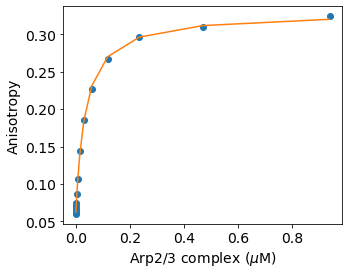

In [8]:
figure_handle, axes_handle = subplots()
figure_handle.set_figwidth(5)
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
axes_handle.plot(arp23_concentration_row, dna_anisotropy(arp23_concentration_row, *p2opt))
axes_handle.tick_params(labelsize = 14)
axes_handle.set_ylabel(r'Anisotropy', fontsize = 14)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 14)

In [9]:
from numpy import diag
print(p2opt)
print(sqrt(diag(p2cov)))

[0.03217063 0.06212339 0.32879702]
[0.00136279 0.00130323 0.00236894]
